In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Read Data

In [18]:
co=pd.read_csv('owid-co2-data.csv')
temp=pd.read_csv('city_temperature.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
co.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [20]:
temp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


# Data Preprocessing

## merge dataset

Merge two dataset on country and year.

In [21]:
temp.columns=temp.columns.map(lambda x: x.lower())

In [22]:
df=pd.merge(co,temp,on=['country','year'])

In [23]:
df.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,region,state,city,month,day,avgtemperature
0,ALB,Albania,1995,2.066,0.664,0.407,0.081,0.026,0.161,0.052,...,1.160073e+10,22.728,7301.038,1.959,Europe,NaN,Tirana,1,1,-99.0
1,ALB,Albania,1995,2.066,0.664,0.407,0.081,0.026,0.161,0.052,...,1.160073e+10,22.728,7301.038,1.959,Europe,NaN,Tirana,1,2,-99.0
2,ALB,Albania,1995,2.066,0.664,0.407,0.081,0.026,0.161,0.052,...,1.160073e+10,22.728,7301.038,1.959,Europe,NaN,Tirana,1,3,-99.0
3,ALB,Albania,1995,2.066,0.664,0.407,0.081,0.026,0.161,0.052,...,1.160073e+10,22.728,7301.038,1.959,Europe,NaN,Tirana,1,4,-99.0
4,ALB,Albania,1995,2.066,0.664,0.407,0.081,0.026,0.161,0.052,...,1.160073e+10,22.728,7301.038,1.959,Europe,NaN,Tirana,1,5,-99.0


## variable correlation

In [24]:
corr=df.corr()
corr

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,month,day,avgtemperature
year,1.000000,0.092439,-0.033174,-0.059628,0.103644,0.056025,0.093235,-0.024886,0.008174,-0.046229,...,0.047325,-0.044972,0.043627,0.150191,0.100346,-0.007588,-0.240850,-0.026811,-0.002546,0.148089
co2,0.092439,1.000000,0.036697,-0.892557,0.984495,0.259536,0.991489,0.252301,0.202175,-0.112847,...,0.907433,-0.074403,0.814027,0.954167,0.993038,-0.021848,0.087644,-0.001859,-0.000157,0.019823
co2_per_capita,-0.033174,0.036697,1.000000,0.037417,-0.033335,0.565318,-0.000958,0.700631,0.128303,0.467967,...,-0.034486,0.221396,-0.124561,0.029709,0.072779,0.900855,0.468491,0.000761,0.000124,0.038342
trade_co2,-0.059628,-0.892557,0.037417,1.000000,-0.909441,-0.201502,-0.921662,-0.194653,-0.307747,-0.141926,...,-0.829281,0.047885,-0.736964,-0.752028,-0.860528,0.098558,-0.168301,-0.000518,-0.000046,-0.046379
cement_co2,0.103644,0.984495,-0.033335,-0.909441,1.000000,0.267536,0.993608,0.186397,-0.034628,-0.172200,...,0.886733,-0.094490,0.785571,0.914076,0.966718,-0.081878,0.052564,-0.002241,-0.000218,0.028788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
energy_per_capita,-0.007588,-0.021848,0.900855,0.098558,-0.081878,0.530484,-0.080273,0.392714,0.125392,0.403801,...,-0.091098,0.187972,-0.167601,-0.023057,0.026957,1.000000,0.500393,-0.002853,-0.000233,0.029541
energy_per_gdp,-0.240850,0.087644,0.468491,-0.168301,0.052564,0.145265,0.099037,0.270475,0.204336,0.226250,...,0.031774,0.043905,-0.002200,0.016975,0.106516,0.500393,1.000000,-0.000335,-0.000034,-0.001384
month,-0.026811,-0.001859,0.000761,-0.000518,-0.002241,-0.001338,-0.001520,0.000697,-0.002409,0.000403,...,0.000287,-0.000074,-0.000704,-0.000092,-0.004181,-0.002853,-0.000335,1.000000,0.011306,0.034655
day,-0.002546,-0.000157,0.000124,-0.000046,-0.000218,-0.000107,-0.000135,0.000105,-0.000180,0.000047,...,0.000048,-0.000014,-0.000067,0.000043,-0.000372,-0.000233,-0.000034,0.011306,1.000000,-0.002044


## data cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374972 entries, 0 to 1374971
Data columns (total 66 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   iso_code                             1374972 non-null  object 
 1   country                              1374972 non-null  object 
 2   year                                 1374972 non-null  int64  
 3   co2                                  1374972 non-null  float64
 4   co2_per_capita                       1374972 non-null  float64
 5   trade_co2                            1151824 non-null  float64
 6   cement_co2                           1265433 non-null  float64
 7   cement_co2_per_capita                1265433 non-null  float64
 8   coal_co2                             1114413 non-null  float64
 9   coal_co2_per_capita                  1114413 non-null  float64
 10  flaring_co2                          785990 non-null   float64
 11

Remove duplicate values from the dataset.

In [26]:
df.drop_duplicates()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,region,state,city,month,day,avgtemperature
0,ALB,Albania,1995,2.066,0.664,0.407,0.081,0.026,0.161,0.052,...,1.160073e+10,22.728,7301.038,1.959,Europe,NaN,Tirana,1,1,-99.0
1,ALB,Albania,1995,2.066,0.664,0.407,0.081,0.026,0.161,0.052,...,1.160073e+10,22.728,7301.038,1.959,Europe,NaN,Tirana,1,2,-99.0
2,ALB,Albania,1995,2.066,0.664,0.407,0.081,0.026,0.161,0.052,...,1.160073e+10,22.728,7301.038,1.959,Europe,NaN,Tirana,1,3,-99.0
3,ALB,Albania,1995,2.066,0.664,0.407,0.081,0.026,0.161,0.052,...,1.160073e+10,22.728,7301.038,1.959,Europe,NaN,Tirana,1,4,-99.0
4,ALB,Albania,1995,2.066,0.664,0.407,0.081,0.026,0.161,0.052,...,1.160073e+10,22.728,7301.038,1.959,Europe,NaN,Tirana,1,5,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374967,ZMB,Zambia,2014,4.877,0.317,4.113,0.736,0.048,0.484,0.031,...,5.341918e+10,52.303,3396.329,0.979,Africa,NaN,Lusaka,1,18,71.3
1374968,ZMB,Zambia,2014,4.877,0.317,4.113,0.736,0.048,0.484,0.031,...,5.341918e+10,52.303,3396.329,0.979,Africa,NaN,Lusaka,1,19,77.5
1374969,ZMB,Zambia,2014,4.877,0.317,4.113,0.736,0.048,0.484,0.031,...,5.341918e+10,52.303,3396.329,0.979,Africa,NaN,Lusaka,1,20,73.4
1374970,ZMB,Zambia,2014,4.877,0.317,4.113,0.736,0.048,0.484,0.031,...,5.341918e+10,52.303,3396.329,0.979,Africa,NaN,Lusaka,1,21,73.1


### feature selection

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
data1=df[['co2','avgtemperature']]
data1.head()

,co2,avgtemperature
0,2.066,-99.0
1,2.066,-99.0
2,2.066,-99.0
3,2.066,-99.0
4,2.066,-99.0


### feature engineering

In [30]:
# use min-max scale to do feature engineering

from sklearn.preprocessing import MinMaxScaler, scale
scaler = MinMaxScaler() 
scaler.fit(data1)
result = scaler.transform(data1)
result

array([[1.82699852e-04, 0.00000000e+00],
       [1.82699852e-04, 0.00000000e+00],
       [1.82699852e-04, 0.00000000e+00],
       ...,
       [4.46203846e-04, 8.24880383e-01],
       [4.46203846e-04, 8.23444976e-01],
       [4.46203846e-04, 8.14832536e-01]])

### split data

Split data into train data and test data with the ratio of 7:3

In [31]:

from sklearn.model_selection import train_test_split

x=data1.co2
y=data1.avgtemperature
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 


# Model

### 1. Simple linear regression explores the relationship between average temperature and co2

In [32]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 

model = linear_model.LinearRegression()
model.fit(x_train.values.reshape(-1,1), y_train)
y_pred = model.predict(x_test.values.reshape(-1,1))
print("MSE =",mean_squared_error(y_test, y_pred), end='      ')
print("R2 =",r2_score(y_test, y_pred))


MSE = 1654.5474343943463      R2 = 0.00045271556089210296


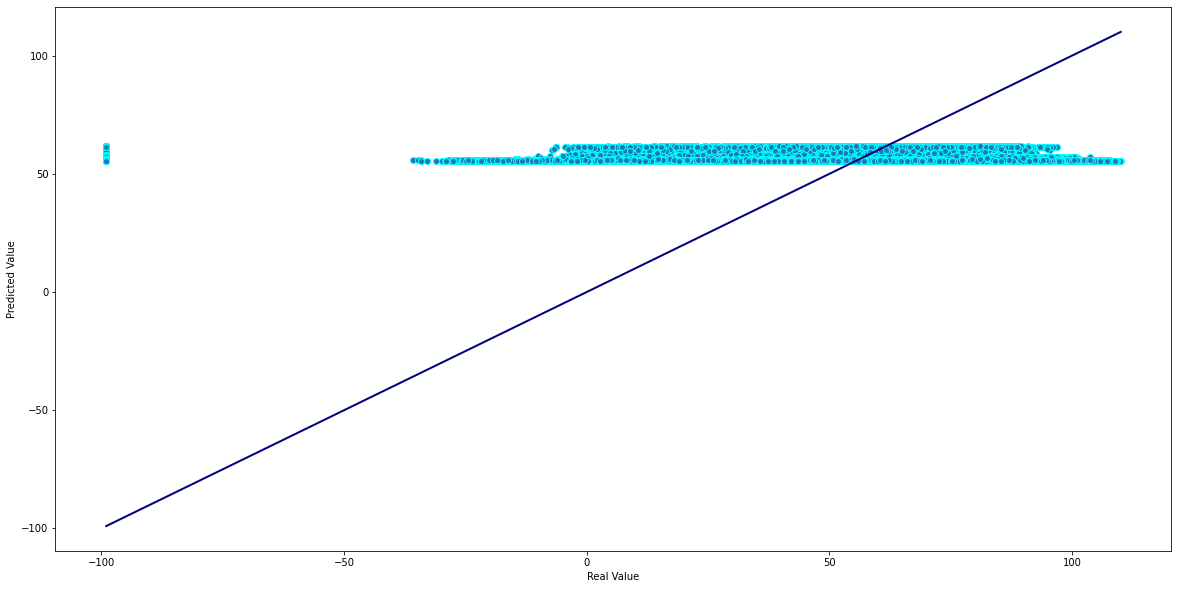

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y_test, y_pred, edgecolors="aqua")
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=2, color='navy')
ax.set_xlabel('Real Value')
ax.set_ylabel('Predicted Value')
plt.show()


From this model result, it can be observed that RMSE is 1654, which is too large, and R-square is 0.0004, which is too small. Thus, average temperature and Co2 emissions have no linear relationship. 

We use LinearRegression as our model, because project requires a linear model. The benefits of linear regression model are simple and convenient, and the results are intuitive. The limitation is that it can only fit linear relationships, and the fitting results are poor when the true relationship is nonlinear. 

### 2. Multiple linear regression to explore whether different areas of the planet are affected differently by emission increase

In [53]:
fit2=sm.formula.ols('avgtemperature~co2+country+co2*country',data=df).fit()
print(fit2.params)

Intercept                   -127.571154
country[T.Algeria]           192.573417
country[T.Argentina]         186.901289
country[T.Australia]         176.588410
country[T.Austria]           177.191710
                                ...    
co2:country[T.Uruguay]       -40.605397
co2:country[T.Uzbekistan]    -41.077033
co2:country[T.Venezuela]     -41.035198
co2:country[T.Vietnam]       -41.079637
co2:country[T.Zambia]        -41.778164
Length: 232, dtype: float64


In [54]:
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:         avgtemperature   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     2590.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:21:03   Log-Likelihood:            -6.7973e+06
No. Observations:             1374972   AIC:                         1.360e+07
Df Residuals:                 1374740   BIC:                         1.360e+07
Df Model:                         231                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In this model, we use Co2 emissions, countries, and the intersection of Co2 emissions and countries as independent variables. In the summary table, all the p-value of variables are 0.000, which means that Co2 emissions, countries, and the intersection of Co2 emissions and countries all have significant effect on average temperature. Thus, different areas of the planet are affected differently by emission increase